**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [336]:
import numpy as np
import pandas as pd
import datetime as dt
import math
import ipywidgets as widgets
from types import SimpleNamespace
from copy import copy
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [337]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [338]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [339]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [340]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [341]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [342]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In order to show numerically that the statement above maximizes profit for $\kappa \in \{1.0,2.0\}$, we are calculating the optimal profit and optimal $\ell_t$ for both values for $\kappa$.

In [343]:
# calculate profits
def calculate_profits(kappa, eta, w, ell):
    price = kappa * ell**(-eta)
    profits = price * ell - w * ell
    return profits

# Define the parameters
eta = 0.5
w = 1.0
kappas = [1.0, 2.0]

for kappa in kappas:
    best_ell = ((1 - eta) * kappa / w) ** (1 / eta)
    max_profits = calculate_profits(kappa, eta, w, best_ell)
    
    # Compare profits for different ell values
    ell_values = np.linspace(0.01, 5.0, num=100)
    profit_values = []
    for ell in ell_values:
        profits = calculate_profits(kappa, eta, w, ell)
        profit_values.append(profits)
    
    # Find the ell value that maximizes profits
    optimal_ell = ell_values[np.argmax(profit_values)]
    max_profits_numeric = np.max(profit_values)
    
    # Print the results
    print(f"For kappa = {kappa}:")
    print(f"Analytical optimal ell: {best_ell:.2f}, Maximized profits: {max_profits:.2f}")
    print(f"Numerical optimal ell: {optimal_ell:.2f}, Maximized profits (numeric): {max_profits_numeric:.2f}")
    print()

For kappa = 1.0:
Analytical optimal ell: 0.25, Maximized profits: 0.25
Numerical optimal ell: 0.26, Maximized profits (numeric): 0.25

For kappa = 2.0:
Analytical optimal ell: 1.00, Maximized profits: 1.00
Numerical optimal ell: 1.02, Maximized profits (numeric): 1.00



kommenter på resultatet

### Ny opgave

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [368]:
# set the parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120
K = 2000
seed_value = 1

# set random seed
np.random.seed(seed_value)

# define the policy function (defined for question 3, but introducing it now for consistency)
def policy_function(kappa, eta, w, delta):
    return ((1 - eta) * kappa / w) ** (1 / eta) if abs(kappa - w) > delta else kappa

# calculate H based on the policy with delta=0
def calculate_H_with_policy(delta):
    # initialize variables
    kappa = 1.0
    employment = 0
    H = 0
    # simulate shock series
    shock_series = [np.log(kappa)]

    for t in range(120):
        # generate shock
        epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon)
        shock = rho * shock_series[t] + epsilon
        shock_series.append(shock)

        # calculate policy employment level
        employment_policy = policy_function(np.exp(shock), eta, w, delta)

        # update employment level
        employment = employment_policy if abs(employment - employment_policy) > delta else employment

        # calculate profits
        price = np.exp(shock) * employment ** (-eta)
        profits = price * employment - w * employment

        # add profits to H
        H += R ** (-t) * (profits - int(abs(employment - employment_policy) > delta) * iota)

    return H

# calculate H using the given policy and fixed Delta
H_values = []

# repeat the calculation multiple times to get a consistent result
num_iterations = 3500
for _ in range(num_iterations):
    H = calculate_H_with_policy(delta=0)
    H_values.append(H)

# take the average of the calculated H values
average_H = np.mean(H_values)

print("Average H:", round(average_H, 2))

Average H: 28.91


We have chosen to put $K=2000$, as this is suitable for obtaining a correct result. By doing so, we get a value of $H=28.91$

### Ny opgave

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [358]:
#set seed
np.random.seed(seed_value)

# calculate H using the given policy and fixed delta=0.05
fixed_delta = 0.05
H_fixed_delta_values = []

# repeat the calculation multiple times in order to get precise results
num_iterations = 3500
for _ in range(num_iterations):
    H_fixed_delta = calculate_H_with_policy(delta=fixed_delta)
    H_fixed_delta_values.append(H_fixed_delta)

# take the average of the calculated H values
average_H_fixed_delta = np.mean(H_fixed_delta_values)

print("Average H with delta = 0.05:", round(average_H_fixed_delta, 2))

Average H with delta = 0.05: 23.89


We now get a value of $H=23.89$, using the same number of shock series $K=2000$. We can see, that including $\Delta=0.05$ decreses the profitability, as H is now $23.89$ instead of $28.91$ as we found in Q2. There is thus no improvement of profitability when including the new policy.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

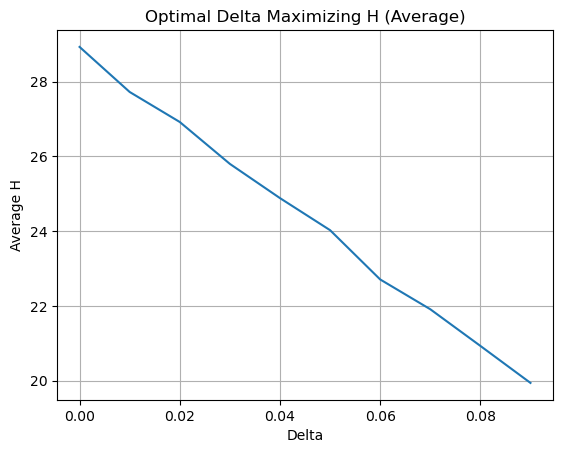

Optimal Delta: 0.0
Maximized H: 28.93


In [364]:
# making list of delta values and H values
delta_values = np.arange(0, 0.1, 0.01)
H_values = []

# repeat the optimization process multiple times to get consistent results
num_iterations = 1000
for _ in range(num_iterations):
    H_values_iter = []
    for delta in delta_values:
        H = calculate_H_with_policy(delta)
        H_values_iter.append(H)
    H_values.append(H_values_iter)

# take the average of the calculated H values for each delta
average_H_values = np.mean(H_values, axis=0)

# find the optimal Delta maximizing H
optimal_delta_index = np.argmax(average_H_values)
optimal_delta = delta_values[optimal_delta_index]
max_H = average_H_values[optimal_delta_index]

# plot the relationship between Delta and average H
plt.plot(delta_values, average_H_values)
plt.xlabel("Delta")
plt.ylabel("Average H")
plt.title("Optimal Delta Maximizing H (Average)")
plt.grid(True)
plt.show()

print("Optimal Delta:", round(optimal_delta, 2))
print("Maximized H:", round(max_H, 2))

In this case, we can see that H is actually optimized when $\Delta=0.0$. In this case we have that $H=28.93$. We can see from the plot than the larger the value of $\Delta$ gets, the more the profitability decreases. We can thus conclude that the new policy, does not make profitability. 

### Ny opgave


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In order to improve profitability

Average H with delta = 0.05: 1786.01

For kappa = 1.0:
Analytical optimal ell: 0.50, Maximized profits: 0.21
Numerical optimal ell: 0.50, Maximized profits (numeric): 0.21

For kappa = 2.0:


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [348]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [349]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [350]:
# write your code here